# Perceptron Implementation

We have created an implementation of a perceptron with the following properties:


1.   The weigths updating is carried out by means of **Delta Rule**
2.   The activation function by defaults is $Tanh$




In [1]:
import random
import numpy
import math

class Perceptron():
    
    #Initialization
    def __init__(self, learning_rate=0.01, epochs=100):
        self.n = learning_rate
        self.epochs=epochs

    #Training Method
    def fit(self, xTrain:list, yTrain:list):
        self.w = self.__generarPesos(len(xTrain[0])+1)
        x = self.__fillX(xTrain)
        y = yTrain
        for i in range(self.epochs):
            deltaW = self.__aprendizaje(x, y) #Basic perceptron operation
            self.w = self.__actualizarPesos(deltaW) # Update Weigths

        return self.w
    #Prediction Method
    def predict(self, dataSet: list):
        predicciones = []
        
        for i in range(0,len(dataSet)):
            prediccion = self.__predictVector(dataSet[i])
            predicciones.append(prediccion)

        return predicciones

######################## Métodos auxiliares ########################
    def __predictVector(self, vector: list):
        vectorX0 = self.__addX0(vector)

        resultado = self.__funcionActivacion(self.__productoPunto(self.w,vectorX0))
        return resultado

    def __generarPesos(self, longitud: int, seed=1):
        random.seed(seed)
        w = []
        for i in range(0,longitud):
            w.append(random.uniform(-1,1))
        return w

    def __funcionActivacion(self, yValue: float):
        evaluacion = math.tanh(yValue)
        if evaluacion <= 0:
            return 0
        else:
            return 1

    def __productoPunto(self, w: list, x: list):
        resultado = numpy.dot(w, x)
        return resultado

    def __aprendizaje(self, x: list, y: list):
        deltaW = []
        for i in range(len(self.w)):
            wi = 0
            for j in range(len(x)):
                od = self.__predictVector(x[j])
                wi += (y[j] - od) * x[j][i] 
            wi *= self.n
            deltaW.append(wi)
        return deltaW

    def __actualizarPesos(self, deltaW: list):
        resultado = []
        for i in range(len(self.w)):
            resultado.append(self.w[i]+deltaW[i])
        return resultado

    def __addX0(self, xi):
        xiX0 = xi.copy()
        
        if len(xiX0) != len(self.w):
            xiX0.insert(0,1)
        
        return xiX0

    def __fillX(self, x):
        xFilled = []
        for i in range(len(x)):
            xFilled.append(self.__addX0(x[i]))
        return xFilled

    def obtenerX(self, dataSet: list):
        x = []
        for i in range(len(dataSet)):
            vX = []
            for j in range(len(dataSet[i])-1):
                vX.append(dataSet[i][j])
            x.append(vX)
        return x

    def obtenerY(self, dataSet: list):
        y = []
        for i in range(len(dataSet)):
                y.append(dataSet[i][-1])
        return y

## Load Data

In [3]:
import pandas as pd
######################################################
#Uncomment the block online or local depending your
#execution environment
######################################################
#Mount Directory
#from google.colab import files
#uploaded = files.upload()
import io
dataset = pd.read_csv('data/perceptron.csv', header=0, encoding="utf-8",sep=",")

#Online
#Load dataset
#dataset = pd.read_csv('data3.csv')

#Show dataset 
dataset.head()


,X1,X2,Y
0,0.261893,0.008374,0
1,0.138444,0.244667,0
2,0.219330,0.056949,0
3,0.282442,0.132147,0
4,0.128757,0.066208,0


##**Data Visualization**

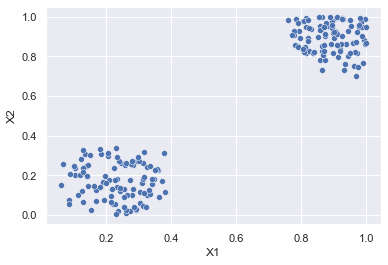

In [4]:
#Optional: Visualize data
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="X1", y="X2", data=dataset)

## **Training**

In [5]:

#This task depends on several assumptions based on experience, for instance, 
X = dataset.loc[:, 'X1':'X2'] 
y = dataset['Y'] # Unknown rows, one column

y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 200, dtype: int64

### Define training and test datasets

In [6]:
from sklearn.model_selection import train_test_split
#Define the sizes of training set and test dataset, applying 80-20 criterion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Create an instance of my perceptron

In [7]:
myPerceptron = Perceptron(epochs=1000)

### Training process

In [8]:
myPerceptron.fit(X_train.values.tolist(),
                 y_train.values.tolist())

[-0.7312715117751976, 0.6948674738744653, 0.5275492379532281]

## **Prediction**

In [9]:
y_pred=myPerceptron.predict(X_test.values.tolist())

print(y_test)
print(y_pred)

18     0
170    1
107    1
98     0
177    1
182    1
5      0
146    1
12     0
152    1
61     0
125    1
180    1
154    1
80     0
7      0
33     0
130    1
37     0
74     0
183    1
145    1
45     0
159    1
60     0
123    1
179    1
185    1
122    1
44     0
16     0
55     0
150    1
111    1
22     0
189    1
129    1
4      0
83     0
106    1
Name: Y, dtype: int64
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1]


### Evaluation


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_ = confusion_matrix(y_test.values.tolist(), y_pred)
print(confusion_)
print("Perceptron Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[18  0]
 [ 0 22]]
Perceptron Accuracy: 1.0


### Prediction Visualization

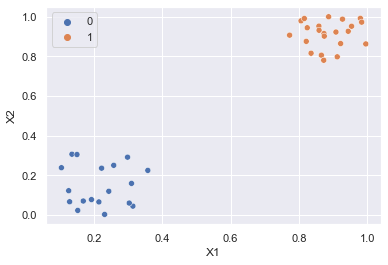

In [11]:
ax = sns.scatterplot(x="X1", y="X2", data=X_test, hue=y_pred)

## **Exercise 1**: 
Train the perceptron using the dataset perceptron2.csv and describe the resulting predictions

In [14]:
dataset2 = pd.read_csv('data/perceptron2.csv', header=0, encoding="utf-8",sep=",")
dataset2.head()

,X1,X2,Y
0,0.417624,0.739346,0
1,0.543847,0.815210,0
2,0.562581,0.727578,0
3,0.437229,0.808660,0
4,0.476559,0.789699,0


In [15]:
X_test.head()

,X1,X2
18,0.231166,0.002266
170,0.835237,0.815701
107,0.858175,0.952487
98,0.192666,0.077110
177,0.873014,0.915071


In [23]:
y_pred2 = myPerceptron.predict(dataset2[['X1', 'X2']].values.tolist())

In [24]:
confusion_2 = confusion_matrix(
    dataset2['Y'], y_pred2
)
print(confusion_2)

[[33 67]
 [80 20]]


In [25]:
print("Perceptron Accuracy:",metrics.accuracy_score(dataset2['Y'], y_pred2))

Perceptron Accuracy: 0.265
